# Recommendation Systems Evolutionary Dynamics

## Imports

In [1]:
from recommendation_systems_evolutionary_dynamics import EGT
import numpy as np
import matplotlib.pylab as plt

## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

In [2]:
strategies_counts = [[9, 1],[9, 1],[9, 1]]
actions_names = ["Defect", "Cooperate"]
players_names = ["Public", "Private", "Civil"]

paramss = [[0.15, 0.15, 0.4, 0.8, 0.2], [0.15, 0.15, 0.4, 0, 0.2], [0.2, 0.5, 0.6, 0, 0.3]]
params = paramss[0] 
cs = params[0]
ct = params[1]
bs = params[2]
br = params[3]
alpha = params[4]

payoff_matrix = {(0, 0, 0): [0, alpha, alpha],
                 (0, 0, 1): [0, 0, 0],
                 (0, 1, 0): [0, -ct, 0],
                 (0, 1, 1): [0, alpha - ct, alpha],
                 (1, 0, 0): [0, alpha, alpha],
                 (1, 0, 1): [br - cs, 0, bs],
                 (1, 1, 0): [-cs, bs - ct, 0],
                 (1, 1, 1): [br - 2*cs, alpha + bs - ct, alpha + bs]}

game = EGT.Game(strategies_counts=strategies_counts, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique_counts(P)}")
print(game.get_payoff_matrix())

P0: UniqueCountsResult(values=array([0, 1]), counts=array([9, 1]))
P1: UniqueCountsResult(values=array([0, 1]), counts=array([9, 1]))
P2: UniqueCountsResult(values=array([0, 1]), counts=array([9, 1]))
{(0, 0, 0): [0, 0.2, 0.2], (0, 0, 1): [0, 0, 0], (0, 1, 0): [0, -0.15, 0], (0, 1, 1): [0, 0.05000000000000002, 0.2], (1, 0, 0): [0, 0.2, 0.2], (1, 0, 1): [0.65, 0, 0.4], (1, 1, 0): [-0.15, 0.25, 0], (1, 1, 1): [0.5, 0.45000000000000007, 0.6000000000000001]}


## Evolutionry Dynamics (Finite Populations)

### Moran Process

#### Birth_Death Async

In [6]:
steps = 20000
rep = 5

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

Replicate: 1
Replicate: 2
Replicate: 3
Replicate: 4


##### Evolution Visualization

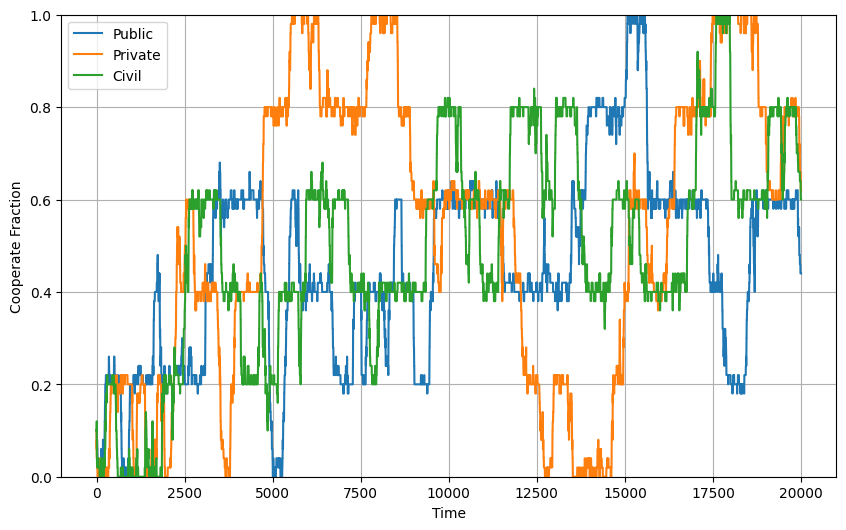

In [7]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

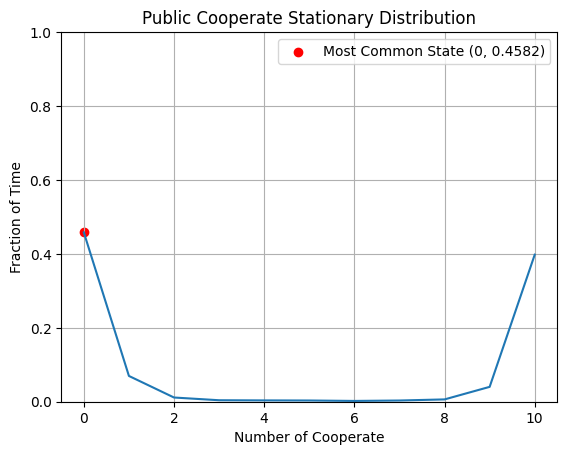

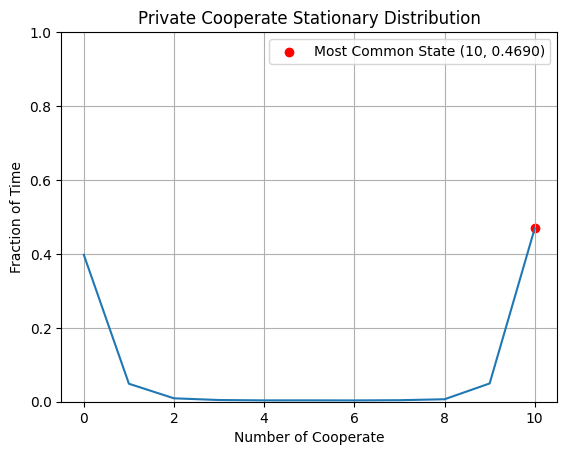

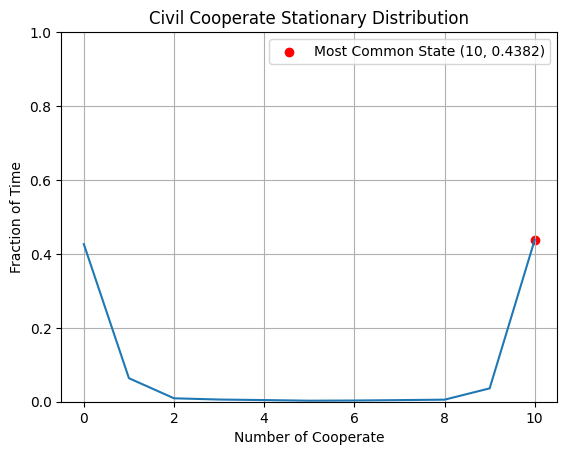

In [9]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

#### Birth_Death Sync

In [12]:
steps = 400
rep = 10

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

Replicate: 2
Replicate: 4
Replicate: 6
Replicate: 8


##### Evolution Visualization

In [ ]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

In [ ]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

#### Death-Birth Async

In [ ]:
steps = 100000
rep = 20

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

Replicate: 4
Replicate: 8


##### Evolution Visualization

In [ ]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

In [ ]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

#### Death-Birth Sync

In [ ]:
steps = 400
rep = 10

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

In [ ]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

#### Pairwise Async

In [ ]:
steps = 20000
rep = 10

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

In [ ]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

#### Pairwise Sync

In [ ]:
steps = 400
rep = 10

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
action = 1
game.plot_strategy_evol(mean_fractionss_hist, action=action, xlabel="Time", ylabel=f"{actions_names[action]} Fraction")

##### Stationary Distribution

In [ ]:
action = 1
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=action, xlabel=f"Number of {actions_names[action]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[action]} Stationary Distribution")

### Transition Matrix (Embedded Markov Chain)

In [4]:
matrix, states = game.compute_trans_matrix(beta=0.08)
matrix.shape

0
1
2
3
4
5
6
7


(8, 8)

#### Embedded Markov Chain Visualization

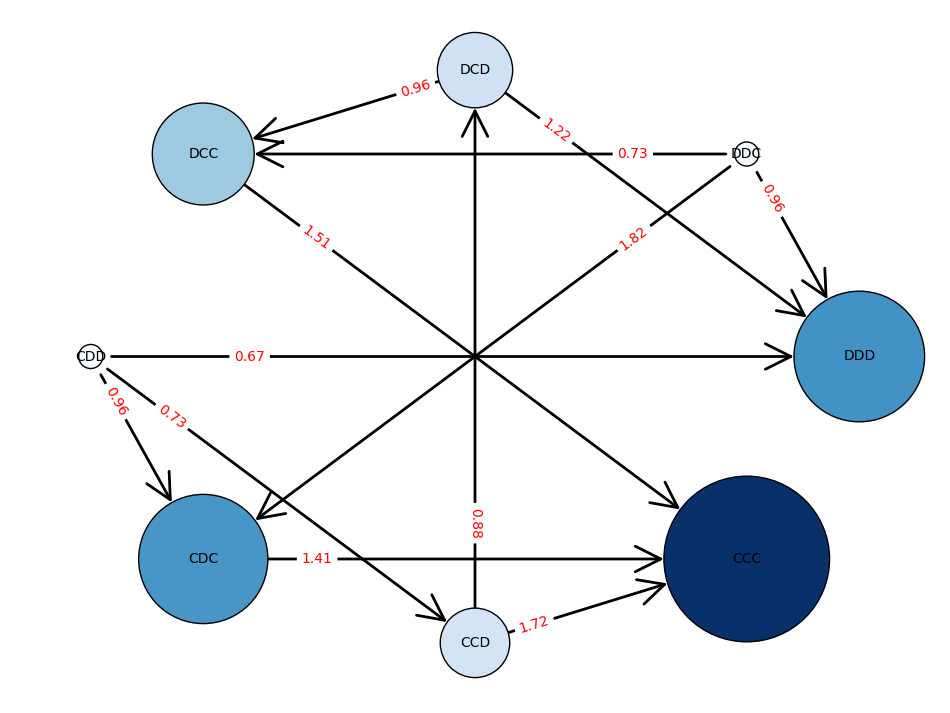

In [5]:
actions_symbols = ["D", "C"]
game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=100)

#### Stationary distrtibution from Transition Matrix 

In [5]:
stationary_distribution = game.compute_stationary_distribution(matrix)
stationary_distribution

array([0.10581846, 0.04122291, 0.06222019, 0.04838605, 0.09110888,
       0.12915068, 0.08830201, 0.43379083])

##### Visualize Stationary Distributions

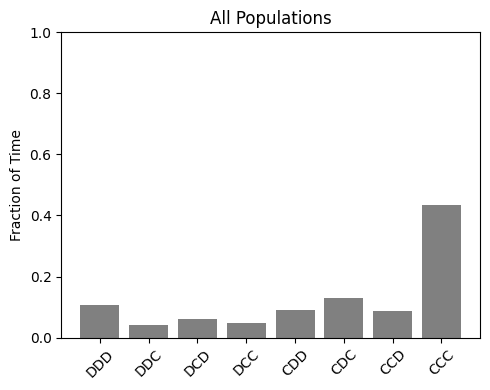

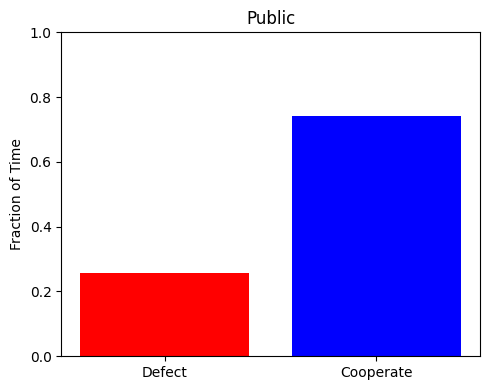

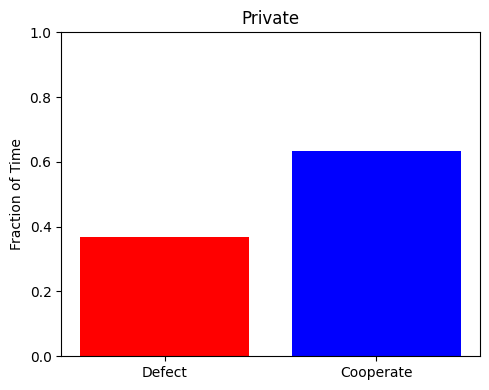

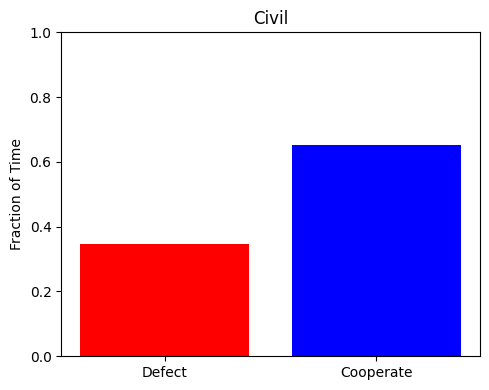

In [6]:
game.plot_stationary_distribution_all_pop(stationary_distribution, actions_symbols=actions_symbols, states=states, title="All Populations", ylabel="Fraction of Time")
for player in range(len(players_names)):
    game.plot_stationary_distribution_per_pop(stationary_distribution, player=player, actions_symbols=actions_symbols, states=states, title=players_names[player], ylabel="Fraction of Time")

### Gradient of Selection (for 3-population 2 actions games)

In [5]:
beta = 2.5 
mu = 0.02
X, Y, Z, G1, G2, G3 = game.compute_gradient_of_selection(beta, mu)

#### Visualize Gradient of Selection

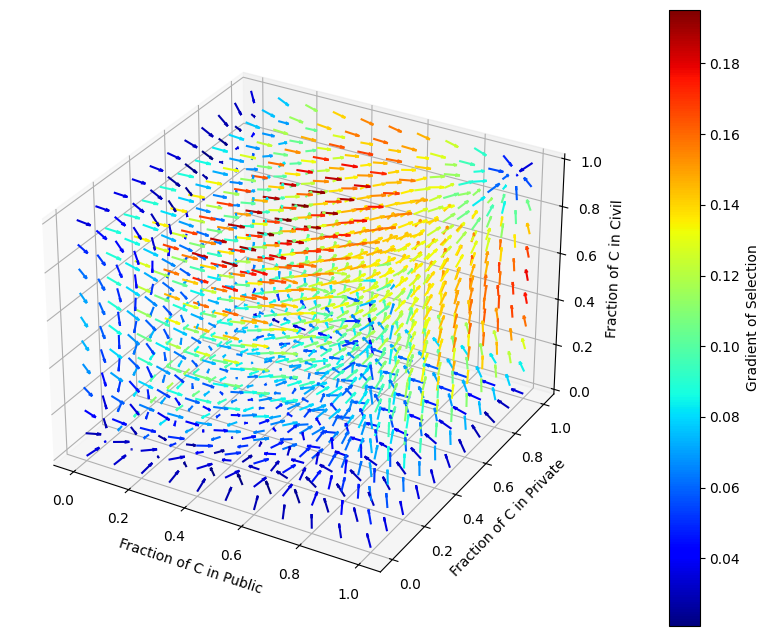

In [17]:
game.plot_gradient_of_selection(X, Y, Z, G1, G2, G3, players_names=players_names, fraction_name="C", legend="Gradient of Selection")

## Evolutionary Dynamics (Infinite Populations)

### Replicator Dynamics

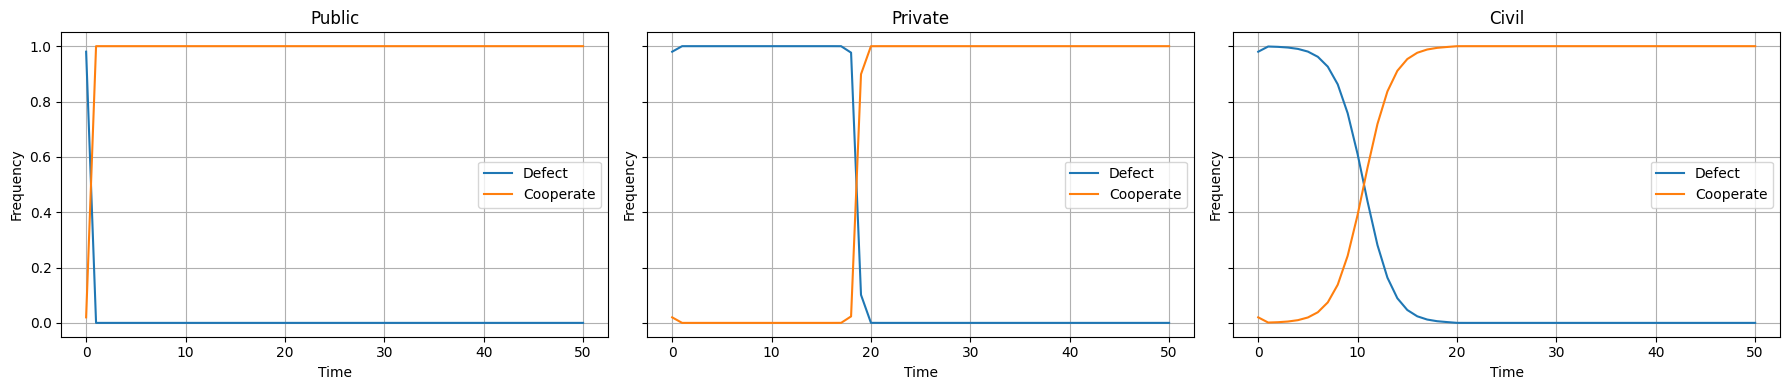

In [5]:
steps=50
fractions_hist = game.run_replicator_dynamics(steps=steps, players_names=["Public", "Private", "Civil"], actions_names=["Defect", "Cooperate"])

In [32]:
import random
l = [0.2, 0.8]

selected = []
for i in range(10000000):
    if i % 1000000//5 == 0:
        print(i)
    ind = random.randint(0, 1)
    prob = random.random()
    while prob > l[ind]:
        ind = random.randint(0, 1)
        prob = random.random()
    selected.append(l[ind])
        
selected = np.array(selected)
counts = np.unique_counts(selected)[0]
print(counts)

0
1
2
3
4
1000000
1000001
1000002
1000003
1000004
2000000
2000001
2000002
2000003
2000004
3000000
3000001
3000002
3000003
3000004
4000000
4000001
4000002
4000003
4000004
5000000
5000001
5000002
5000003
5000004
6000000
6000001
6000002
6000003
6000004
7000000
7000001
7000002
7000003
7000004
8000000
8000001
8000002
8000003
8000004
9000000
9000001
9000002
9000003
9000004
[0.2 0.8]
